<a href="https://colab.research.google.com/github/gajordano/Exercicio-Challanger-AluraStore/blob/main/Exerc%C3%ADcio_Challanger_AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [100]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [101]:
pip install matplotlib

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
import pandas as pd


# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Converter a coluna de data e extrair mês e ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Mês'] = lojas['Data da Compra'].dt.month
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Calcular o faturamento por venda
lojas['Faturamento'] = (lojas['Preço'] + lojas['Frete']).round(2)

# Criar tabela pivot com faturamento mensal por loja
faturamento_mensal = lojas.pivot_table(
    index=['Ano', 'Mês'],
    columns='Nome da Loja',
    values='Faturamento',
    aggfunc='sum',
    fill_value=0
).round(2)

# Adicionar linha com totais anuais
totais_anuais = faturamento_mensal.groupby('Ano').sum()
totais_anuais.index = pd.MultiIndex.from_tuples([(ano, 'Total') for ano in totais_anuais.index])

# Concatenar os dados mensais com os totais anuais
faturamento_completo = pd.concat([faturamento_mensal, totais_anuais]).sort_index()

# Formatar para moeda brasileira
def formatar_moeda(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# Aplicar formatação a todas as colunas numéricas
faturamento_formatado = faturamento_completo.copy()
for col in faturamento_formatado.columns:
    faturamento_formatado[col] = faturamento_formatado[col].apply(formatar_moeda)

# Renomear o índice para melhor apresentação
faturamento_formatado.index.names = ['Ano', 'Mês']
faturamento_formatado = faturamento_formatado.rename_axis('Lojas', axis=1)

# Salvar em Excel
nome_arquivo = 'faturamento_mensal_lojas.xlsx'
faturamento_completo.to_excel(nome_arquivo, float_format="%.2f")

print(f"Planilha gerada com sucesso: {nome_arquivo}")
print("\nFaturamento Mensal por Loja:\n")
print(faturamento_formatado)

Planilha gerada com sucesso: faturamento_mensal_lojas.xlsx

Faturamento Mensal por Loja:

Lojas              Loja 1         Loja 2         Loja 3         Loja 4
Ano  Mês                                                              
2020 1       R$ 46.450,18   R$ 43.731,80   R$ 33.433,44   R$ 27.125,07
     2       R$ 56.277,84   R$ 24.417,19   R$ 38.745,87   R$ 32.171,60
     3       R$ 44.311,16   R$ 42.868,58   R$ 42.153,04   R$ 40.042,26
     4       R$ 47.297,89   R$ 38.817,22   R$ 49.626,74   R$ 55.428,20
     5       R$ 54.174,23   R$ 35.791,67   R$ 36.671,78   R$ 44.908,60
     6       R$ 36.927,98   R$ 36.600,09   R$ 24.514,93   R$ 37.691,06
     7       R$ 49.282,12   R$ 33.105,72   R$ 47.185,06   R$ 37.812,00
     8       R$ 43.731,99   R$ 32.987,72   R$ 36.326,61   R$ 43.808,41
     9       R$ 42.483,77   R$ 43.747,72   R$ 37.427,31   R$ 39.566,80
     10      R$ 29.717,40   R$ 46.693,53   R$ 26.029,42   R$ 24.835,60
     11      R$ 27.929,84   R$ 31.693,63   R$ 32.109,60   

In [104]:
# Adicionar coluna com o nome da loja em cada DataFrame
loja1['Nome da Loja'] = 'Loja 1'
loja2['Nome da Loja'] = 'Loja 2'
loja3['Nome da Loja'] = 'Loja 3'
loja4['Nome da Loja'] = 'Loja 4'

# Combinar todas as lojas em um único DataFrame
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Converter a coluna de data para o tipo datetime
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)

# Criar coluna de faturamento (Preço + Frete) para cada venda
lojas['Faturamento'] = (lojas['Preço'] + lojas['Frete']).round(2)

# Extrair o ano da data da compra
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Calcular o faturamento anual por loja
faturamento_anual_por_loja = lojas.groupby(['Nome da Loja', 'Ano'])['Faturamento'].sum().round(2)

# Formatar a saída
print("Faturamento Anual por Loja:\n")
for (loja, ano), faturamento in faturamento_anual_por_loja.items():
    print(f"{loja} - {ano}: R$ {faturamento:,.2f}")

# Alternativamente, podemos mostrar em formato de tabela
print("\nResumo em Tabela:")
print(faturamento_anual_por_loja.unstack().to_markdown(floatfmt=",.2f"))

Faturamento Anual por Loja:

Loja 1 - 2020: R$ 518,239.63
Loja 1 - 2021: R$ 508,456.22
Loja 1 - 2022: R$ 444,569.81
Loja 1 - 2023: R$ 145,081.33
Loja 2 - 2020: R$ 450,178.69
Loja 2 - 2021: R$ 493,113.23
Loja 2 - 2022: R$ 503,095.83
Loja 2 - 2023: R$ 121,385.54
Loja 3 - 2020: R$ 451,700.04
Loja 3 - 2021: R$ 509,786.12
Loja 3 - 2022: R$ 492,221.30
Loja 3 - 2023: R$ 88,340.06
Loja 4 - 2020: R$ 464,502.02
Loja 4 - 2021: R$ 488,559.81
Loja 4 - 2022: R$ 424,502.42
Loja 4 - 2023: R$ 80,689.31

Resumo em Tabela:
| Nome da Loja   |       2020 |       2021 |       2022 |       2023 |
|:---------------|-----------:|-----------:|-----------:|-----------:|
| Loja 1         | 518,239.63 | 508,456.22 | 444,569.81 | 145,081.33 |
| Loja 2         | 450,178.69 | 493,113.23 | 503,095.83 | 121,385.54 |
| Loja 3         | 451,700.04 | 509,786.12 | 492,221.30 |  88,340.06 |
| Loja 4         | 464,502.02 | 488,559.81 | 424,502.42 |  80,689.31 |


# 2. Vendas por Categoria


In [105]:
# 2. Análise por categoria de produto
faturamento_por_categoria = lojas.groupby('Categoria do Produto')['Faturamento'].sum()
print("\nFaturamento por Categoria de Produto:")
print(faturamento_por_categoria.to_string())

# Formatar para moeda brasileira
def formatar_moeda(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')


Faturamento por Categoria de Produto:
Categoria do Produto
brinquedos                103502.37
eletrodomesticos         1860198.65
eletronicos              2332048.06
esporte e lazer           200891.95
instrumentos musicais     489701.46
livros                     53007.35
moveis                   1064149.67
utilidades domesticas      80921.85


In [106]:
import pandas as pd

# Carregar os dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Converter a coluna de data e extrair o ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Calcular o faturamento por venda
lojas['Faturamento'] = (lojas['Preço'] + lojas['Frete']).round(2)

# Tabela 1: Faturamento total por categoria por loja
faturamento_categoria_loja = lojas.pivot_table(
    index='Categoria do Produto',
    columns='Nome da Loja',
    values='Faturamento',
    aggfunc='sum',
    fill_value=0
).round(2)

# Adicionar totais
faturamento_categoria_loja['Total'] = faturamento_categoria_loja.sum(axis=1)
faturamento_categoria_loja.loc['Total'] = faturamento_categoria_loja.sum()

print("Tabela 1 - Faturamento Total por Categoria de Produto por Loja:\n")
print(faturamento_categoria_loja.to_markdown(floatfmt=",.2f"))

# Tabela 2: Faturamento anual por categoria por loja
faturamento_anual_categoria_loja = lojas.pivot_table(
    index=['Ano', 'Categoria do Produto'],
    columns='Nome da Loja',
    values='Faturamento',
    aggfunc='sum',
    fill_value=0
).round(2)

# Adicionar totais por ano
faturamento_anual_categoria_loja['Total'] = faturamento_anual_categoria_loja.sum(axis=1)

print("\nTabela 2 - Faturamento Anual por Categoria de Produto por Loja:\n")
print(faturamento_anual_categoria_loja.to_markdown(floatfmt=",.2f"))

# Opcional: Salvar as tabelas em arquivos Excel
with pd.ExcelWriter('faturamento_categorias.xlsx') as writer:
    faturamento_categoria_loja.to_excel(writer, sheet_name='Total por Loja')
    faturamento_anual_categoria_loja.to_excel(writer, sheet_name='Anual por Loja')

print("\nAs tabelas foram salvas no arquivo 'faturamento_categorias.xlsx'")

Tabela 1 - Faturamento Total por Categoria de Produto por Loja:

| Categoria do Produto   |       Loja 1 |       Loja 2 |       Loja 3 |       Loja 4 |        Total |
|:-----------------------|-------------:|-------------:|-------------:|-------------:|-------------:|
| brinquedos             |    25,299.27 |    22,445.84 |    27,258.59 |    28,498.67 |   103,502.37 |
| eletrodomesticos       |   510,678.32 |   489,499.10 |   462,310.44 |   397,710.79 | 1,860,198.65 |
| eletronicos            |   603,278.21 |   576,858.26 |   576,840.37 |   575,071.22 | 2,332,048.06 |
| esporte e lazer        |    55,216.64 |    48,828.92 |    50,020.57 |    46,825.82 |   200,891.95 |
| instrumentos musicais  |   128,243.47 |   147,397.12 |   108,652.53 |   105,408.34 |   489,701.46 |
| livros                 |    12,336.41 |    14,195.82 |    13,326.36 |    13,148.76 |    53,007.35 |
| moveis                 |   263,505.30 |   247,817.06 |   282,475.18 |   270,352.13 | 1,064,149.67 |
| utilidades dome

In [107]:
# 3. Análise por forma de pagamento
faturamento_por_pagamento = lojas.groupby('Tipo de pagamento')['Faturamento'].sum()
print("\nFaturamento por Tipo de Pagamento:")
print(faturamento_por_pagamento.to_string())


Faturamento por Tipo de Pagamento:
Tipo de pagamento
boleto            1236563.74
cartao_credito    4537242.89
cartao_debito       79310.38
cupom              331304.35


In [108]:
# 4. Top 5 vendedores por faturamento
top_vendedores = lojas.groupby('Vendedor')['Faturamento'].sum().nlargest(5)
print("\nTop 5 Vendedores por Faturamento:")
print(top_vendedores.to_string())


Top 5 Vendedores por Faturamento:
Vendedor
Felipe Santos    496867.24
Thiago Silva     491954.40
Larissa Alves    491044.41
Juliana Costa    475180.64
Pedro Gomes      440029.75


In [109]:
# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Calcular o faturamento por venda
lojas['Faturamento'] = (lojas['Preço'] + lojas['Frete']).round(2)

# Agrupar por vendedor e loja, somando o faturamento
top_vendedores = lojas.groupby(['Vendedor', 'Nome da Loja'])['Faturamento'] \
                     .sum() \
                     .reset_index() \
                     .sort_values('Faturamento', ascending=False) \
                     .head(10) \
                     .round(2)

# Renomear colunas para melhor apresentação
top_vendedores.columns = ['Vendedor', 'Loja', 'Faturamento Total (R$)']

# Resetar o índice para começar em 1
top_vendedores.index = range(1, 11)

# Formatar a saída
print("Top 10 Vendedores por Faturamento:\n")
print(top_vendedores.to_markdown(floatfmt=",.2f"))

# Opcional: Salvar em arquivo Excel
top_vendedores.to_excel('top10_vendedores.xlsx', index=False)
print("\nArquivo 'top10_vendedores.xlsx' salvo com sucesso!")

Top 10 Vendedores por Faturamento:

|    | Vendedor       | Loja   |   Faturamento Total (R$) |
|---:|:---------------|:-------|-------------------------:|
|  1 | Larissa Alves  | Loja 1 |               142,459.12 |
|  2 | Larissa Alves  | Loja 3 |               135,373.69 |
|  3 | Rafael Costa   | Loja 1 |               135,201.04 |
|  4 | Felipe Santos  | Loja 4 |               134,010.24 |
|  5 | Thiago Silva   | Loja 1 |               131,686.23 |
|  6 | Thiago Silva   | Loja 2 |               128,946.45 |
|  7 | Felipe Santos  | Loja 1 |               126,730.53 |
|  8 | Pedro Gomes    | Loja 2 |               126,604.89 |
|  9 | Felipe Santos  | Loja 2 |               123,361.17 |
| 10 | Beatriz Moraes | Loja 2 |               122,979.21 |

Arquivo 'top10_vendedores.xlsx' salvo com sucesso!


# 3. Média de Avaliação das Lojas

In [110]:
# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Verificar o nome correto da coluna de avaliação
# (pode variar nos dados originais - 'Avaliação da compra' ou 'Avaliação da compra')
coluna_avaliacao = 'Avaliação da compra' if 'Avaliação da compra' in lojas.columns else 'Avaliação da compra'

# Calcular a média de avaliação por loja
media_avaliacao = lojas.groupby('Nome da Loja')[coluna_avaliacao].mean().round(2).reset_index()
media_avaliacao.columns = ['Loja', 'Média de Avaliação']

# Ordenar do maior para o menor
media_avaliacao = media_avaliacao.sort_values('Média de Avaliação', ascending=False)

# Formatar a saída
print("Média de Avaliação por Loja:\n")
print(media_avaliacao.to_markdown(index=False))

# Opcional: Salvar em arquivo Excel
media_avaliacao.to_excel('media_avaliacao_lojas.xlsx', index=False)
print("\nArquivo 'media_avaliacao_lojas.xlsx' salvo com sucesso!")

Média de Avaliação por Loja:

| Loja   |   Média de Avaliação |
|:-------|---------------------:|
| Loja 3 |                 4.05 |
| Loja 2 |                 4.04 |
| Loja 4 |                 4    |
| Loja 1 |                 3.98 |

Arquivo 'media_avaliacao_lojas.xlsx' salvo com sucesso!


In [111]:
# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Verificar o nome correto da coluna de avaliação
coluna_avaliacao = 'Avaliação da compra' if 'Avaliação da compra' in lojas.columns else 'Avaliação da compra'

# Calcular média e total de avaliações por loja
media_avaliacao = lojas.groupby('Nome da Loja')[coluna_avaliacao].agg(['mean', 'count']).round(2)
media_avaliacao.columns = ['Média de Avaliação', 'Total de Avaliações']

# Ordenar pela melhor avaliação
media_avaliacao = media_avaliacao.sort_values('Média de Avaliação', ascending=False)

# Formatar e mostrar os resultados
print("\n" + "="*50)
print("ANÁLISE DE AVALIAÇÕES POR LOJA")
print("="*50)
print("\nMédia de Avaliação e Volume de Avaliações:\n")
print(media_avaliacao.to_markdown())
print("\n" + "-"*50)

# Mostrar insights adicionais
print("\nPrincipais Insights:")
print(f"- Loja com melhor avaliação média: {media_avaliacao.index[0]} ({media_avaliacao.iloc[0,0]}/5)")
print(f"- Loja com mais avaliações registradas: {media_avaliacao['Total de Avaliações'].idxmax()} ({media_avaliacao['Total de Avaliações'].max()} avaliações)")
print(f"- Diferença entre maior e menor média: {round(media_avaliacao.iloc[0,0] - media_avaliacao.iloc[-1,0], 2)} pontos")


ANÁLISE DE AVALIAÇÕES POR LOJA

Média de Avaliação e Volume de Avaliações:

| Nome da Loja   |   Média de Avaliação |   Total de Avaliações |
|:---------------|---------------------:|----------------------:|
| Loja 3         |                 4.05 |                  2359 |
| Loja 2         |                 4.04 |                  2359 |
| Loja 4         |                 4    |                  2358 |
| Loja 1         |                 3.98 |                  2359 |

--------------------------------------------------

Principais Insights:
- Loja com melhor avaliação média: Loja 3 (4.05/5)
- Loja com mais avaliações registradas: Loja 3 (2359 avaliações)
- Diferença entre maior e menor média: 0.07 pontos


# 4. Produtos Mais e Menos Vendidos

In [112]:
# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)

# Calcular o faturamento por venda
lojas['Faturamento'] = (lojas['Preço'] + lojas['Frete']).round(2)

# 1. Produtos mais vendidos por loja (top 5 por loja)
print("\n" + "="*60)
print("PRODUTOS MAIS VENDIDOS POR LOJA (TOP 5 POR LOJA)")
print("="*60)


PRODUTOS MAIS VENDIDOS POR LOJA (TOP 5 POR LOJA)


In [113]:
# Agrupar por loja e produto, calculando quantidade e faturamento
produtos_por_loja = lojas.groupby(['Nome da Loja', 'Produto']).agg(
    Quantidade=('Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum')
).round(2).sort_values(['Nome da Loja', 'Quantidade'], ascending=[True, False])

In [114]:
# Mostrar os top 5 produtos por loja
for loja in produtos_por_loja.index.get_level_values(0).unique():
    print(f"\n{loja}:")
    print(produtos_por_loja.loc[loja].head(5).to_markdown())
    print("\n" + "-"*40)# Formatar para moeda brasileira

def formatar_moeda(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')



Loja 1:
| Produto            |   Quantidade |   Faturamento_Total |
|:-------------------|-------------:|--------------------:|
| Guarda roupas      |           60 |            41368.1  |
| Micro-ondas        |           60 |            48773.6  |
| TV Led UHD 4K      |           60 |           199656    |
| Secadora de roupas |           58 |            82955.1  |
| Blocos de montar   |           56 |             2610.59 |

----------------------------------------

Loja 2:
| Produto                  |   Quantidade |   Faturamento_Total |
|:-------------------------|-------------:|--------------------:|
| Iniciando em programação |           65 |             4386.64 |
| Micro-ondas              |           62 |            50824.5  |
| Bateria                  |           61 |            64853.1  |
| Pandeiro                 |           58 |             5203.16 |
| Violão                   |           58 |            26188.7  |

----------------------------------------

Loja 3:
| Produ

In [115]:
# 2. Produtos mais vendidos no geral (top 10)
print("\n" + "="*60)
print("PRODUTOS MAIS VENDIDOS - TOTAL GERAL (TOP 10)")
print("="*60)

produtos_geral = lojas.groupby('Produto').agg(
    Quantidade=('Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum'),
    Lojas=('Nome da Loja', lambda x: x.nunique())
).round(2).sort_values('Quantidade', ascending=False)

print(produtos_geral.head(10).to_markdown())


PRODUTOS MAIS VENDIDOS - TOTAL GERAL (TOP 10)
| Produto                  |   Quantidade |   Faturamento_Total |   Lojas |
|:-------------------------|-------------:|--------------------:|--------:|
| Cômoda                   |          210 |            82085.9  |       4 |
| Carrinho controle remoto |          206 |            20771.8  |       4 |
| Micro-ondas              |          206 |           162401    |       4 |
| Bateria                  |          203 |           207574    |       4 |
| Cama king                |          201 |           190711    |       4 |
| Jogo de panelas          |          200 |            42854.7  |       4 |
| Modelagem preditiva      |          200 |            17711.8  |       4 |
| Secadora de roupas       |          200 |           295243    |       4 |
| Blocos de montar         |          199 |             9509.12 |       4 |
| Cama box                 |          199 |           146148    |       4 |


In [116]:
# 3. Resumo por categoria
print("\n" + "="*60)
print("DESEMPENHO POR CATEGORIA DE PRODUTO")
print("="*60)

categoria_stats = lojas.groupby('Categoria do Produto').agg(
    Quantidade=('Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum'),
    Média_Avaliação=('Avaliação da compra', 'mean')
).round(2).sort_values('Quantidade', ascending=False)

print(categoria_stats.to_markdown())



DESEMPENHO POR CATEGORIA DE PRODUTO
| Categoria do Produto   |   Quantidade |   Faturamento_Total |   Média_Avaliação |
|:-----------------------|-------------:|--------------------:|------------------:|
| moveis                 |         1886 |         1.06415e+06 |              4.03 |
| eletronicos            |         1772 |         2.33205e+06 |              3.99 |
| brinquedos             |         1290 |    103502           |              4.07 |
| eletrodomesticos       |         1149 |         1.8602e+06  |              4.01 |
| esporte e lazer        |         1113 |    200892           |              3.99 |
| instrumentos musicais  |          753 |    489701           |              4    |
| livros                 |          742 |     53007.3         |              4    |
| utilidades domesticas  |          730 |     80921.9         |              3.98 |


In [117]:
# Criar e combinar os DataFrames
dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Loja'] = nome_loja
    dfs.append(df)
dados_completos = pd.concat(dfs, ignore_index=True)

# Função para análise dos 10 produtos menos vendidos da rede
def produtos_menos_vendidos_rede(df):
    menos_vendidos = df['Produto'].value_counts().nsmallest(10).reset_index()
    menos_vendidos.columns = ['Produto', 'Quantidade Vendida']

    print("\n" + "="*60)
    print("TOP 10 PRODUTOS MENOS VENDIDOS - REDE ALURA STORE")
    print("="*60)
    print(menos_vendidos.to_markdown(index=False))

# Função para análise por loja
def produtos_menos_vendidos_por_loja(df):
    print("\n" + "="*60)
    print("TOP 10 PRODUTOS MENOS VENDIDOS POR LOJA")
    print("="*60)

    for nome_loja, dados_loja in df.groupby('Loja'):
        menos_vendidos = dados_loja['Produto'].value_counts().nsmallest(10).reset_index()
        menos_vendidos.columns = ['Produto', 'Quantidade Vendida']

        print(f"\n{nome_loja}:")
        print(menos_vendidos.to_markdown(index=False))

# Executar as análises
produtos_menos_vendidos_rede(dados_completos)
produtos_menos_vendidos_por_loja(dados_completos)


TOP 10 PRODUTOS MENOS VENDIDOS - REDE ALURA STORE
| Produto                     |   Quantidade Vendida |
|:----------------------------|---------------------:|
| Celular ABXY                |                  157 |
| Headset                     |                  158 |
| Mochila                     |                  163 |
| Guitarra                    |                  165 |
| Ciência de dados com python |                  166 |
| Assistente virtual          |                  167 |
| Poltrona                    |                  168 |
| Jogo de copos               |                  169 |
| Panela de pressão           |                  172 |
| Smartwatch                  |                  172 |

TOP 10 PRODUTOS MENOS VENDIDOS POR LOJA

Loja 1:
| Produto                     |   Quantidade Vendida |
|:----------------------------|---------------------:|
| Headset                     |                   33 |
| Celular ABXY                |                   33 |
| Panela de pressão

# 5. Frete Médio por Loja


In [118]:
# Criar lista para armazenar os DataFrames
dfs = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)

# Concatenar todos os DataFrames
lojas = pd.concat(dfs, ignore_index=True)


In [119]:
# Converter a coluna de data para datetime e extrair o ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year

# 1. Cálculo do frete médio por loja
frete_medio_por_loja = lojas.groupby('Nome da Loja')['Frete'].agg(['mean', 'count']).round(2)
frete_medio_por_loja.columns = ['Frete Médio (R$)', 'Total de Vendas']

In [120]:
# 2. Cálculo do frete total anual por loja
frete_anual_por_loja = lojas.groupby(['Nome da Loja', 'Ano'])['Frete'].sum().round(2).unstack()

# 3. Cálculo do frete total geral
frete_total_geral = lojas['Frete'].sum().round(2)
frete_medio_geral = lojas['Frete'].mean().round(2)

In [121]:
# Formatar e mostrar os resultados
print("\n" + "="*60)
print("ANÁLISE DE CUSTOS DE FRETE")
print("="*60)

print("\n1. FRETE MÉDIO POR LOJA:")
print(frete_medio_por_loja.to_markdown(floatfmt=",.2f"))

print("\n2. FRETE TOTAL ANUAL POR LOJA (R$):")
print(frete_anual_por_loja.to_markdown(floatfmt=",.2f"))

print("\n3. RESUMO GERAL:")
print(f"- Frete médio global: R$ {frete_medio_geral:,.2f}")
print(f"- Frete total anual (todas as lojas): R$ {frete_total_geral:,.2f}")


ANÁLISE DE CUSTOS DE FRETE

1. FRETE MÉDIO POR LOJA:
| Nome da Loja   |   Frete Médio (R$) |   Total de Vendas |
|:---------------|-------------------:|------------------:|
| Loja 1         |              34.69 |          2,359.00 |
| Loja 2         |              33.62 |          2,359.00 |
| Loja 3         |              33.07 |          2,359.00 |
| Loja 4         |              31.28 |          2,358.00 |

2. FRETE TOTAL ANUAL POR LOJA (R$):
| Nome da Loja   |      2020 |      2021 |      2022 |     2023 |
|:---------------|----------:|----------:|----------:|---------:|
| Loja 1         | 26,328.08 | 25,626.42 | 22,483.56 | 7,399.91 |
| Loja 2         | 22,890.40 | 24,824.36 | 25,460.25 | 6,139.15 |
| Loja 3         | 22,756.95 | 25,847.34 | 24,970.69 | 4,447.68 |
| Loja 4         | 23,372.47 | 24,796.58 | 21,541.05 | 4,045.78 |

3. RESUMO GERAL:
- Frete médio global: R$ 33.17
- Frete total anual (todas as lojas): R$ 312,930.66


In [122]:
# Calcular percentual do frete em relação ao faturamento
lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']
faturamento_total = lojas['Faturamento'].sum()
percentual_frete = (frete_total_geral / faturamento_total * 100).round(2)

print(f"- Percentual do frete sobre o faturamento total: {percentual_frete}%")

- Percentual do frete sobre o faturamento total: 5.06%


Graficos


In [123]:
!pip install seaborn

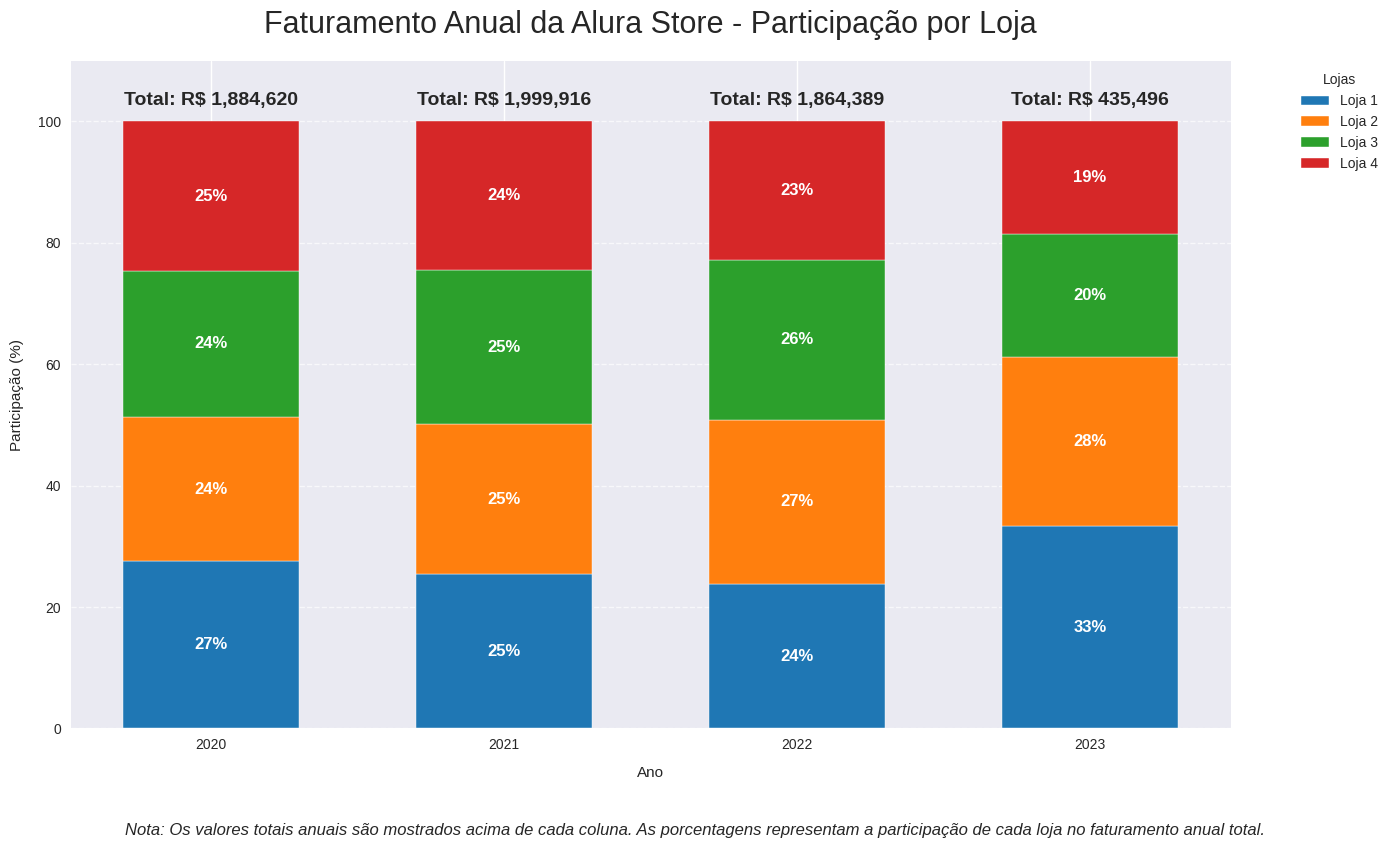

<Figure size 800x550 with 0 Axes>

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Criar e combinar os DataFrames
dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Nome da Loja'] = nome_loja
    dfs.append(df)
lojas = pd.concat(dfs, ignore_index=True)

# Processar os dados
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year
lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']

# Calcular métricas
faturamento_anual = lojas.groupby(['Ano', 'Nome da Loja'])['Faturamento'].sum().unstack()
faturamento_total_por_ano = faturamento_anual.sum(axis=1)
percentuais = (faturamento_anual.div(faturamento_total_por_ano, axis=0) * 100)

# Configurar o gráfico
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8')
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
anos = faturamento_anual.index
lojas_nomes = faturamento_anual.columns

# Criar as barras 100% empilhadas
bottom = np.zeros(len(anos))
bars = []

for i, loja in enumerate(lojas_nomes):
    bar = plt.bar(anos, percentuais[loja], bottom=bottom,
                 color=cores[i], edgecolor='white', label=loja, width=0.6)
    bars.append(bar)
    bottom += percentuais[loja]

# Adicionar os valores totais no topo de cada barra
for ano, total in zip(anos, faturamento_total_por_ano):
    plt.text(ano, 102, f'Total: R$ {total:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=14)

# Adicionar porcentagens dentro de cada segmento
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        bottom = rect.get_y()
        if height > 0:  # Só adiciona label se o valor for maior que zero
            porcentagem = height
            plt.text(rect.get_x() + rect.get_width()/2.,
                    bottom + height/2,
                    f'{porcentagem:.0f}%',
                    ha='center', va='center',
                    color='white', fontweight='bold', fontsize=12)

# Configurações do gráfico
plt.title('Faturamento Anual da Alura Store - Participação por Loja',
          fontsize=22, pad=20)
plt.xlabel('Ano', labelpad=10)
plt.ylabel('Participação (%)', labelpad=10)
plt.xticks(anos)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar limites do eixo Y
plt.ylim(0, 110)

# Adicionar legenda
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar nota explicativa
plt.figtext(0.5, -0.05,
           'Nota: Os valores totais anuais são mostrados acima de cada coluna. As porcentagens representam a participação de cada loja no faturamento anual total.',
           ha='center', fontsize=12, style='italic')

plt.tight_layout()
plt.show()

plt.savefig('faturamento_alura_store.png', dpi=300, bbox_inches='tight')

In [125]:
plt.savefig('faturamento_alura_store.png', dpi=300, bbox_inches='tight', transparent=False)

<Figure size 800x550 with 0 Axes>

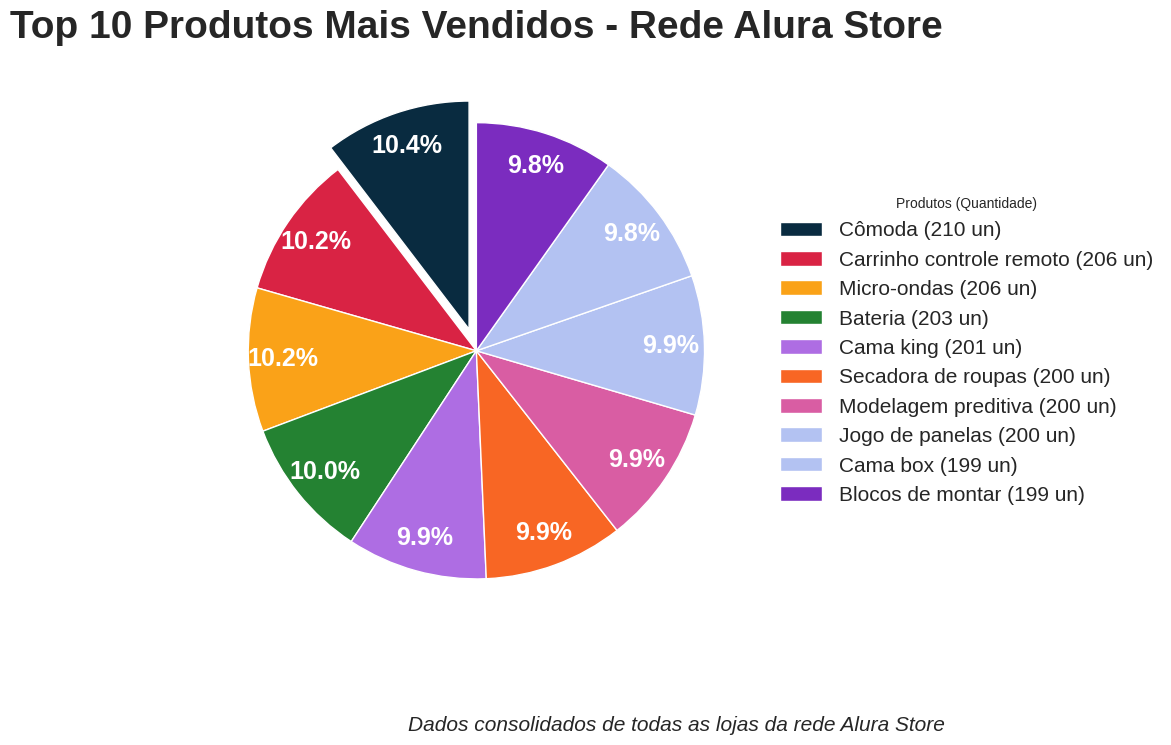

<Figure size 800x550 with 0 Axes>

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das lojas
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Combinar dados de todas as lojas
dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Loja'] = nome_loja
    dfs.append(df)
dados_completos = pd.concat(dfs, ignore_index=True)

# Contar os 10 produtos mais vendidos
top10_produtos = dados_completos['Produto'].value_counts().nlargest(10)

# Configurar o gráfico
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8')

# Paleta de cores personalizada
cores = ['#092b40', '#d92344', '#faa218', '#248232', '#ae6de3', '#f86624', '#d95da3', '#b3c2f2', '#b3c2f2', '#7b2cbf' ]

# Criar gráfico de pizza com destaque no 1º colocado
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Destaca o produto mais vendido

# Gráfico de pizza principal
wedges, texts, autotexts = plt.pie(
    top10_produtos,
    labels=None,  # Removemos labels padrão para usar legenda personalizada
    autopct=lambda p: f'{p:.1f}%',  # Formato das porcentagens
    startangle=90,
    colors=cores,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 18, 'color': 'white', 'weight': 'bold'},
    pctdistance=0.85  # Ajusta posição das porcentagens
)

# Título
plt.title('Top 10 Produtos Mais Vendidos - Rede Alura Store',
          fontsize=28, pad=20, weight='bold')

# Legenda personalizada (fora do gráfico)
legenda_labels = [f'{produto} ({quantidade} un)'
                 for produto, quantidade in zip(top10_produtos.index, top10_produtos)]
plt.legend(wedges, legenda_labels,
          title="Produtos (Quantidade)",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          fontsize=15)

# Ajustar layout
plt.tight_layout()

# Nota explicativa
plt.figtext(0.5, 0.01,
           'Dados consolidados de todas as lojas da rede Alura Store',
           ha='center', fontsize=15, style='italic')

plt.tight_layout()
plt.show()

plt.savefig('top_10_produtos_mais_vendidos.png', dpi=300, bbox_inches='tight')

In [127]:
plt.savefig('Top 5 Produtos Mais Vendidos.png', dpi=300, bbox_inches='tight', transparent=False)

<Figure size 800x550 with 0 Axes>

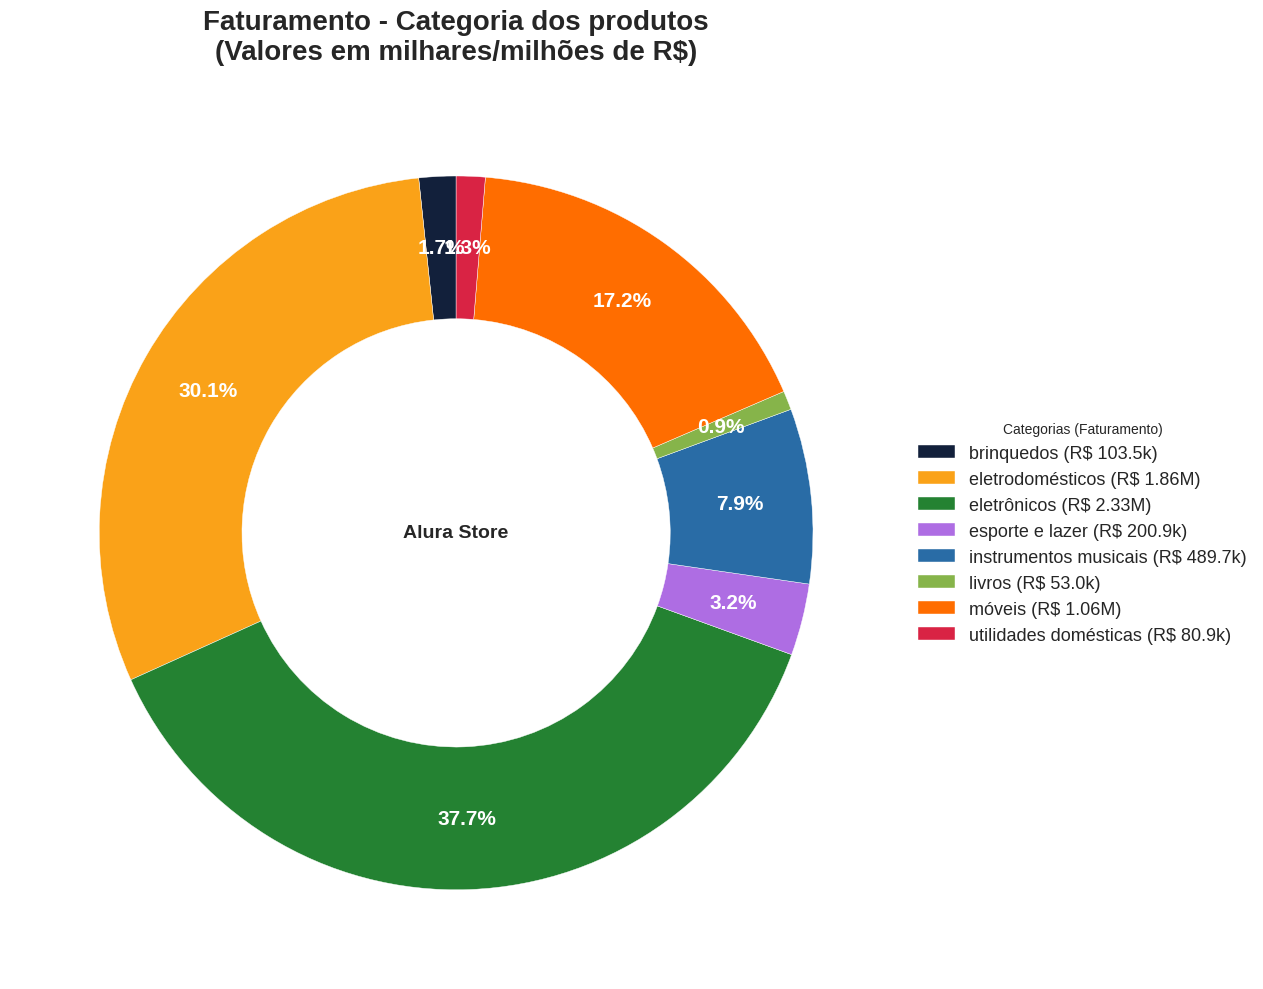

<Figure size 800x550 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados = {
    'brinquedos': 103502.37,
    'eletrodomésticos': 1860198.65,
    'eletrônicos': 2332048.06,
    'esporte e lazer': 200891.95,
    'instrumentos musicais': 489701.46,
    'livros': 53007.35,
    'móveis': 1064149.67,
    'utilidades domésticas': 80921.85
}

# Preparar os dados
categorias = list(dados.keys())
valores = list(dados.values())

# Função para formatar em milhares/milhões
def formatar_valor(valor):
    if valor >= 1000000:
        return f'R$ {valor/1000000:.2f}M'
    else:
        return f'R$ {valor/1000:.1f}k'

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(12, 10))
plt.style.use('seaborn-v0_8')

# Cores personalizadas
cores = ['#12203b', '#faa218', '#248232', '#ae6de3',
         '#296ca6', '#86b44a', '#ff6d00', '#d92344']

# Criar gráfico de rosca
wedges, texts, autotexts = ax.pie(valores,
                                 labels=None,
                                 colors=cores,
                                 startangle=90,
                                 wedgeprops=dict(width=0.4, edgecolor='white'),
                                 autopct=lambda p: f'{p:.1f}%',
                                 pctdistance=0.8)

# Ajustar as porcentagens
plt.setp(autotexts, size=15, weight='bold', color='white')

# Adicionar legenda com valores formatados
legend_labels = [f"{cat} ({formatar_valor(val)})" for cat, val in dados.items()]
ax.legend(wedges, legend_labels,
          title="Categorias (Faturamento)",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          fontsize=13)

# Adicionar título
plt.title('Faturamento - Categoria dos produtos\n(Valores em milhares/milhões de R$)',
          fontsize=20, pad=20, fontweight='bold')

# Adicionar texto central (opcional)
centro_circulo = plt.Circle((0,0), 0.2, color='white')
ax.add_artist(centro_circulo)
ax.text(0, 0, "Alura Store",
        ha='center', va='center',
        fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

plt.savefig('faturamento_dos_categoria_produtos.png', dpi=300, bbox_inches='tight')

In [129]:
plt.savefig('faturamento_dos_categoria_produtos', dpi=300, bbox_inches='tight', transparent=False)

<Figure size 800x550 with 0 Axes>

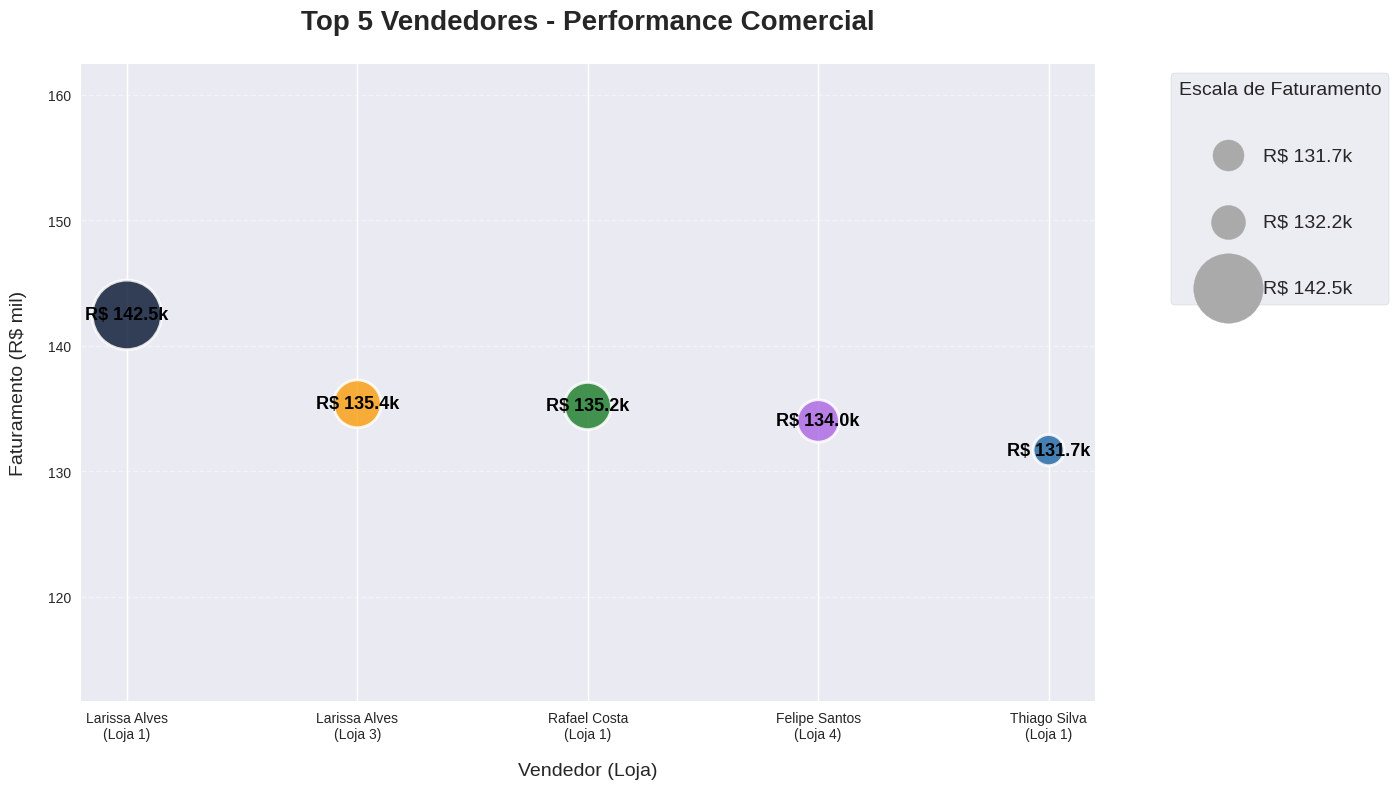

<Figure size 800x550 with 0 Axes>

In [130]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados = [
    {'Vendedor': 'Larissa Alves', 'Loja': 'Loja 1', 'Faturamento': 142459.12},
    {'Vendedor': 'Larissa Alves', 'Loja': 'Loja 3', 'Faturamento': 135373.69},
    {'Vendedor': 'Rafael Costa', 'Loja': 'Loja 1', 'Faturamento': 135201.04},
    {'Vendedor': 'Felipe Santos', 'Loja': 'Loja 4', 'Faturamento': 134010.24},
    {'Vendedor': 'Thiago Silva', 'Loja': 'Loja 1', 'Faturamento': 131686.23}
]

# Ordenar os dados por faturamento (do maior para o menor)
dados_ordenados = sorted(dados, key=lambda x: x['Faturamento'], reverse=True)

# Preparar os dados
vendedores = [f"{d['Vendedor']}\n({d['Loja']})" for d in dados_ordenados]
valores = [d['Faturamento']/1000 for d in dados_ordenados]  # Em milhares de R$

# Calcular tamanhos das bolhas proporcionais ao faturamento
faturamento_min = min(d['Faturamento'] for d in dados_ordenados)
faturamento_max = max(d['Faturamento'] for d in dados_ordenados)
tamanho_min = 500  # Tamanho mínimo da bolha (para o menor faturamento)
tamanho_max = 2500  # Tamanho máximo da bolha (para o maior faturamento)
tamanhos = [tamanho_min + (d['Faturamento'] - faturamento_min) /
            (faturamento_max - faturamento_min) * (tamanho_max - tamanho_min)
            for d in dados_ordenados]

# Configuração do gráfico
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8')

# Paleta de cores
cores = ['#12203b', '#faa218', '#248232', '#ae6de3', '#296ca6']

# Criar gráfico de bolhas
scatter = plt.scatter(
    vendedores,
    valores,
    s=tamanhos,          # Tamanhos proporcionais ao faturamento
    c=cores,
    alpha=0.85,
    edgecolors='white',
    linewidths=2
)

# Configurações do gráfico
plt.title('Top 5 Vendedores - Performance Comercial',
          fontsize=20, pad=25, fontweight='bold')  # Título com fonte 20
plt.xlabel('Vendedor (Loja)', fontsize=14, labelpad=15)
plt.ylabel('Faturamento (R$ mil)', fontsize=14, labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ajustar limites para espaço extra
plt.ylim(min(valores)-20, max(valores)+20)

# Adicionar valores dentro das bolhas
for i, (vendedor, valor) in enumerate(zip(vendedores, valores)):
    plt.text(
        vendedor,
        valor,
        f'R$ {valor:.1f}k',
        ha='center',
        va='center',
        fontsize=13,
        fontweight='bold',
        color='black'
    )

# Legenda de tamanho (com fonte 14 como solicitado)
for tamanho in [tamanho_min, (tamanho_min+tamanho_max)/5, tamanho_max]:
    valor_legenda = faturamento_min + (tamanho - tamanho_min) / (tamanho_max - tamanho_min) * (faturamento_max - faturamento_min)
    plt.scatter([], [], c='#aaaaaa', alpha=1, s=tamanho,
                label=f'R$ {valor_legenda/1000:.1f}k')

plt.legend(
    title='Escala de Faturamento',
    title_fontsize=14,  # Título da legenda com fonte 14
    fontsize=14,       # Texto da legenda com fonte 14
    labelspacing=2.5,
    bbox_to_anchor=(1.3, 1),
    frameon=True,
    framealpha=0.9
)

# Ajustes finais de layout
plt.tight_layout()

# Salvar em alta qualidade
plt.savefig('top5_vendedores_bolhas_proporcionais.png',
            dpi=350,
            bbox_inches='tight',
            facecolor='white')

plt.tight_layout()
plt.show()

plt.savefig('top_5_Vendedores_performance_comercial.png', dpi=300, bbox_inches='tight')


6. Relatório


In [131]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from datetime import datetime

import os
from pathlib import Path

def criar_pasta_graficos():
    """Cria a pasta 'graficos' se não existir e retorna o caminho completo"""
    try:
        # Caminho absoluto para a pasta
        caminho_pasta = Path(os.path.abspath('graficos'))

        # Verifica e cria a pasta se necessário
        if not caminho_pasta.exists():
            caminho_pasta.mkdir()
            print(f"✅ Pasta 'graficos' criada com sucesso em: {caminho_pasta}")
        else:
            print(f"ℹ️ Pasta 'graficos' já existe em: {caminho_pasta}")

        return caminho_pasta

    except Exception as e:
        print(f"❌ Erro ao criar pasta: {e}")
        raise  # Re-lança a exceção para tratamento externo

# Teste da função
if __name__ == "__main__":
    caminho = criar_pasta_graficos()
    print(f"Caminho completo: {caminho}")

ℹ️ Pasta 'graficos' já existe em: /content/graficos
Caminho completo: /content/graficos


In [132]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
from datetime import datetime

def gerar_relatorio_consolidado():
    # Configurações
    pasta_graficos = 'graficos'
    nome_pdf = "Relatório Alura Store - Principais dados.pdf"

    # Verificar se a pasta existe
    if not os.path.exists(pasta_graficos):
        os.makedirs(pasta_graficos)
        print(f"Pasta '{pasta_graficos}' criada com sucesso!")

    # Criar PDF
    with PdfPages(nome_pdf) as pdf:
        # Capa
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        plt.text(0.5, 0.7, 'Relatório Alura Store',
                ha='center', va='center', fontsize=24, fontweight='bold')
        plt.text(0.5, 0.6, 'Principais Dados',
                ha='center', va='center', fontsize=18)
        plt.text(0.5, 0.5, datetime.now().strftime('%d/%m/%Y'),
                ha='center', va='center', fontsize=14)
        pdf.savefig()
        plt.close()

        # Capítulo 1: Faturamento
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        texto = """
        Capítulo 1 - Faturamento

        As lojas apresentam um excelente equilíbrio no faturamento, a diferença máxima entre
        a loja com maior e menor faturamento é de apenas 3%, a discrepância maior é no ano
        de 2023 pois consta apenas os 3 primeiros meses do ano.
        """
        plt.text(0.1, 0.8, texto, ha='left', va='top', fontsize=12, linespacing=1.8)

        # Adicionar gráfico de faturamento se existir
        faturamento_img = os.path.join(pasta_graficos, 'faturamento_alura_store.png')
        if os.path.exists(faturamento_img):
            img = plt.imread(faturamento_img)
            plt.figimage(img, xo=100, yo=300, alpha=1, origin='upper')

        pdf.savefig()
        plt.close()

        # Capítulo 2: Produtos mais vendidos
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        texto = """
        Capítulo 2 - Produtos mais vendidos por unidades e em R$ milhares

        Analisando os gráficos de produtos mais vendidos existem informações a serem consideradas:

        Enquanto o maior número de unidades vendidas foram as cômodas com 210 unidades ao total,
        o maior faturamento em reais foram a categoria de eletrônicos com mais de R$ 2 milhões
        em vendas no período, seguido pela categoria de eletrodomésticos com R$ 1,86 milhão em vendas.

        Poderão ser pensadas estratégias de vendas tanto para aumentar as vendas dos produtos
        que os consumidores mais compram em unidades como a categoria de móveis como a categoria
        de eletrônicos, que segundo os dados de "Desempenho por Categoria" estão em 2º lugar,
        mas no faturamento total, ocupa 37,7% do faturamento.
        """
        plt.text(0.1, 0.8, texto, ha='left', va='top', fontsize=12, linespacing=1.8)

        # Adicionar gráfico de produtos se existir
        produtos_img = os.path.join(pasta_graficos, 'Top top_10_produtos_mais_vendidos.png')
        if os.path.exists(produtos_img):
            img = plt.imread(produtos_img)
            plt.figimage(img, xo=100, yo=200, alpha=1, origin='upper')

        produtos_img = os.path.join(pasta_graficos, 'faturamento_dos_categoria_produtos.png')
        if os.path.exists(faturamento_img):
            img = plt.imread(faturamento_img)
            plt.figimage(img, xo=100, yo=200, alpha=1, origin='upper')

        pdf.savefig()
        plt.close()


        # Capítulo 3: Maiores vendedores
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        texto = """
        Capítulo 3 - Maiores vendedores

        O ranking dos 5 maiores vendedores está disputado, com uma diferença menor de 9% entre
        o primeiro lugar, com a vendedora Larissa Alves, e o vendedor Thiago Silva, ambos
        funcionários da Loja 1.

        Entre os top vendedores, a Loja 1 se destaca com 3 colaboradores, as Lojas 3 e 4 aparecem
        com um funcionário cada. O destaque negativo fica para a Loja 2 que não está com nenhum
        vendedor no podium.
        """
        plt.text(0.1, 0.8, texto, ha='left', va='top', fontsize=12, linespacing=1.8)

        # Adicionar gráfico de vendedores se existir
        vendedores_img = os.path.join(pasta_graficos, 'top_5_Vendedores_performance_comercial.png')
        if os.path.exists(vendedores_img):
            img = plt.imread(vendedores_img)
            plt.figimage(img, xo=100, yo=250, alpha=1, origin='upper')

        pdf.savefig()
        plt.close()

        # Considerações finais
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        texto = """
        Considerações finais:

        Ao analisar as informações, podem ser extraídos insights importantes, como mesmo com um
        faturamento quase que igualitário entre as lojas, pode ser estudada a razão da Loja 1
        possuir os melhores vendedores e replicar a ação para outras lojas, de forma a aumentar
        o faturamento.

        Investir em marketing na categoria de eletrônicos pode aumentar as vendas e melhorar o
        desempenho nas vendas da Loja 2 na categoria. Ao mesmo tempo que a loja 2 se destaca na
        venda de instrumentos musicais, as mesmas estratégias podem ser replicadas nas outras lojas.
        Extrair as melhores práticas e compartilhar as estratégias com todas as lojas é uma forma
        de reconhecer e valorizar o trabalho dos funcionários e vendedores ao mesmo tempo que
        fornece informações dos melhores processos de vendas.
        """
        plt.text(0.1, 0.8, texto, ha='left', va='top', fontsize=12, linespacing=1.8)
        pdf.savefig()
        plt.close()

    print(f"Relatório gerado com sucesso: {nome_pdf}")

# Executar a função
gerar_relatorio_consolidado()

Relatório gerado com sucesso: Relatório Alura Store - Principais dados.pdf
